# Import Packages and data exploration

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('vdjdb.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

In [3]:
dataset.isnull().sum()

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1145
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64

# Data Transformation

## Removing Unwanted Columns

Some of the columns contain specific information about the literature sources (reference.id), sequencing methods (method, web.method.seq), collection method (web.method) etc., some of which are related to how **vdjdb.score** is calculated.

Therefore we first remove these columns. Deleted columns are as follows: 
-  reference.id
-  method
-  meta
-  cdr3fix
-  web.method  
-  web.method.seq
-  web.cdr3fix.nc
-  web.cdr3fix.unmp

(Work by Yutong)

In [4]:
dataset = dataset.iloc[:, list(range(0, 12)) + [16]]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.2+ MB


## Combine cdr3-v_seg-j_seg in one column

In [5]:
def create_cdr3_v_j_column(row):
    """
    This function will combine cdr3, v-segm and j-segm
    """
    cdr3 = row['cdr3']
    v_segm = row['v.segm']
    j_segm = row['j.segm']
    final_string = ''
    
    if not pd.isna(cdr3):
        final_string = cdr3
    if not pd.isna(v_segm):
        final_string = final_string + '_' + v_segm
    if not pd.isna(j_segm):
        final_string = final_string + '_' + j_segm
    
    return final_string

dataset['cdr3_v_j'] = dataset.apply(create_cdr3_v_j_column,axis=1)

In [6]:
dataset['cdr3_v_j'].head(5)

0          CIVRAPGRADMRF_TRAV26-1*01_TRAJ43*01
1    CASSYLPGQGDHYSNQPQHF_TRBV13*01_TRBJ1-5*01
2     CASSFEAGQGFFSNQPQHF_TRBV13*01_TRBJ1-5*01
3           CAVPSGAGSYQLTF_TRAV20*01_TRAJ28*01
4     CASSFEPGQGFYSNQPQHF_TRBV13*01_TRBJ1-5*01
Name: cdr3_v_j, dtype: object

## Separate Alpha, Beta chains datasets

In [7]:
dataset['gene'].unique()

array(['TRA', 'TRB'], dtype=object)

In [8]:
dataset_alpha = dataset[dataset['gene'] == 'TRA']
dataset_beta = dataset[dataset['gene'] == 'TRB']

In [9]:
dataset_alpha.head(4)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_v_j
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CIVRAPGRADMRF_TRAV26-1*01_TRAJ43*01
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CAVPSGAGSYQLTF_TRAV20*01_TRAJ28*01
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CAVKASGSRLT_TRAV2*01
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CAYRPPGTYKYIF_TRAV38-2/DV8*01_TRAJ40*01


In [10]:
dataset_beta.head(4)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_v_j
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSYLPGQGDHYSNQPQHF_TRBV13*01_TRBJ1-5*01
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSFEAGQGFFSNQPQHF_TRBV13*01_TRBJ1-5*01
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSFEPGQGFYSNQPQHF_TRBV13*01_TRBJ1-5*01
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSYEPGQVSHYSNQPQHF_TRBV13*01_TRBJ1-5*01


# Relationship Exploration 

## Dataset grouped on anitegen.epitoge, finding the count of cdr3_v_j

In [11]:
group_epitope_cdr3_v_j = dataset.groupby(['antigen.epitope','cdr3_v_j']).size().to_frame('count').reset_index()
group_epitope_cdr3_v_j.head(5)

,antigen.epitope,cdr3_v_j,count
0,AAFKRSCLK,CAGAIPRDDKIIF_TRAV27*01_TRAJ30*01,1
1,AAFKRSCLK,CAGARNDYKLSF_TRAV25*01_TRAJ20*01,1
2,AAFKRSCLK,CALATHTGTASKLTF_TRAV38-1*01_TRAJ44*01,1
3,AAFKRSCLK,CASSLNPGRSDSPLHF_TRBV7-6*01_TRBJ2-1*01,1
4,AAFKRSCLK,CASSQDPGSSYNEQFF_TRBV4-3*01_TRBJ2-1*01,1


### Finding top 10 values

In [12]:
group_epitope_cdr3_v_j.sort_values(['count'],ascending=False,inplace=True)
group_epitope_cdr3_v_j.to_csv('Visualisation_Df/group_epitope_cdr3_v_j.csv',index=False)

## Dataset grouped on species & anitegen.epitoge, finding the count of cdr3_v_j

In [13]:
group_epitope_species_cdr3_v_j = dataset.groupby(['antigen.epitope','species','cdr3_v_j']).size().to_frame('count').reset_index()

### Top 10 values

In [14]:
group_epitope_species_cdr3_v_j.sort_values(['count','antigen.epitope'],ascending=False,inplace=True)

In [15]:
len(group_epitope_species_cdr3_v_j.head(50)[group_epitope_species_cdr3_v_j['antigen.epitope'] == 'GILGFVFTL'])

<ipython-input-15-9a52ab0b4f1e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(group_epitope_species_cdr3_v_j.head(50)[group_epitope_species_cdr3_v_j['antigen.epitope'] == 'GILGFVFTL'])


17

## Count of most occurring CDR3_V_J combinations for each species

In [16]:
count_of_cdr3_v_j_df = dataset.groupby(['cdr3_v_j','species']).size().to_frame('count').reset_index()

In [17]:
count_of_cdr3_v_j_df.sort_values(['count'],ascending=False,inplace=True)

## Count of records for each species

In [18]:
count_of_species_df = dataset.groupby(['species']).size().to_frame('count').reset_index()

In [19]:
count_of_species_df

,species,count
0,HomoSapiens,85329
1,MacacaMulatta,2119
2,MusMusculus,5323


## Count of records for each species and vdj_score

In [20]:
count_of_species_vdj_df = dataset.groupby(['species','vdjdb.score']).size().to_frame('count').reset_index()
count_of_species_vdj_df.to_csv('Visualisation_Df/count_of_species_vdj_df.csv',index=False)

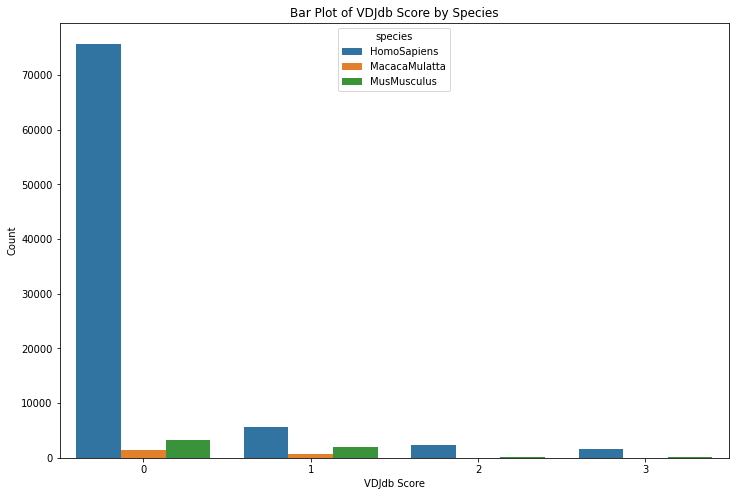

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='vdjdb.score', y='count', hue='species', data=count_of_species_vdj_df)
plt.title('Bar Plot of VDJdb Score by Species')
plt.xlabel('VDJdb Score')
plt.ylabel('Count')

# Save the plot as an image (PNG format by default)
plt.savefig('Figures/Bar_Plot_of_VDJdb_Score_by_Species.png')

plt.show()

In [22]:
count_of_species_vdj_df

,species,vdjdb.score,count
0,HomoSapiens,0,75747
1,HomoSapiens,1,5700
2,HomoSapiens,2,2280
3,HomoSapiens,3,1602
4,MacacaMulatta,0,1432
5,MacacaMulatta,1,687
6,MusMusculus,0,3178
7,MusMusculus,1,1942
8,MusMusculus,2,56
9,MusMusculus,3,147


---

## Can one CDR3 find more than 1 Epitope?

Yes

In [23]:
group_cdr3_antigen = dataset.groupby(['cdr3'])['antigen.epitope'].unique().to_frame('antigen_found').reset_index()

In [24]:
cdr3_found = []
for index,row in group_cdr3_antigen.iterrows():
    if len(row[1]) > 1:
        cdr3_found.append([row[0],len(row[1])])
#         print(row)
 

In [25]:
cdr3_found[:10]

[['CAAADNYGQNFVF', 3],
 ['CAAAETSYDKVIF', 5],
 ['CAAALNTNAGKSTF', 2],
 ['CAAANSGTYQRF', 2],
 ['CAAARDDKIIF', 3],
 ['CAAARMDSSYKLIF', 5],
 ['CAAASSGSWQLIF', 2],
 ['CAAATSSGQKLVF', 2],
 ['CAADDGRLMF', 2],
 ['CAADGGATNKLIF', 2]]

## Can one epitope find more than 1 CDR3?

Yes

In [26]:
group_antigen_cdr3 = dataset.groupby(['antigen.epitope'])['cdr3'].unique().to_frame('cdr3_found').reset_index()

In [27]:
group_antigen_cdr3['cdr3_found_count'] = group_antigen_cdr3['cdr3_found'].apply(lambda x:len(x))

In [28]:
group_antigen_cdr3.sort_values(by=['cdr3_found_count'],ascending=False,inplace=True)

In [29]:
group_antigen_cdr3[group_antigen_cdr3['cdr3_found_count'] < 10]

,antigen.epitope,cdr3_found,cdr3_found_count
412,KGYVYQGL,"[CASSSGVGTEVFF, CASSLGTGTEVFF, CASSPGTGVEQYF, ...",9
193,FLGKIWPSHK,"[CASSFTSGTDTQYF, CASSYVGGDGYTF, CASSLAAGGDEQYF...",9
612,MLAKALRKV,"[CAGPIGTSYDKVIF, CASSSAHYGYTF, CAASDDNYGQNFVF,...",9
326,HMTEVVRHC,"[CAMSGLKEDSSYKLIF, CASSIQQGADTQYF, CVVQPGGYQKV...",9
1,AAGIGILTV,"[CAVNFGGGKLIF, CASSLSFGTEAFF, CAGGTGNQFYF, CAI...",9
...,...,...,...
351,IIWFLLLSV,[CASSLRSMNTEAFF],1
632,MPLKAPKEV,[CASTLTPNTEAFF],1
347,IIFWFSLEL,[CASSLTGTKNNEQFF],1
168,FFSYFAVHF,[CASNPSRGGVTGELFF],1


---

In [30]:
dataset.groupby(['gene']).size()

gene
TRA    38049
TRB    54722
dtype: int64

---

In [31]:
dataset.groupby(['mhc.class']).size()

mhc.class
MHCI     88368
MHCII     4403
dtype: int64

---

---

## How valueable is the different lengths of the CDR

In [32]:
sample_dataset = dataset[['cdr3','antigen.epitope','vdjdb.score','species','antigen.species','gene','mhc.class']]

#### Taking only beta chains of humans

In [33]:
sample_dataset = sample_dataset[(sample_dataset['gene'] == 'TRB') & (sample_dataset['species'] == 'HomoSapiens')]

In [34]:
sample_dataset.head(5)

,cdr3,antigen.epitope,vdjdb.score,species,antigen.species,gene,mhc.class
1,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI
2,CASSFEAGQGFFSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI
4,CASSFEPGQGFYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI
6,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI
8,CASSALASLNEQFF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI


### Creating subset for positive and negative sampling

In [35]:
# positive = sample_dataset[sample_dataset['vdjdb.score'] > 1]
# negative = sample_dataset[sample_dataset['vdjdb.score'] < 2]

### Removing Duplicates

In [36]:
sample_dataset.columns

Index(['cdr3', 'antigen.epitope', 'vdjdb.score', 'species', 'antigen.species',
       'gene', 'mhc.class'],
      dtype='object')

In [37]:
duplicate_indexes = sample_dataset[sample_dataset.duplicated(keep='last')].index
duplicate_indexes

Int64Index([   30,    31,    33,    37,   104,   154,   171,   221,   233,
              398,
            ...
            92726, 92728, 92732, 92734, 92738, 92746, 92750, 92752, 92754,
            92756],
           dtype='int64', length=7824)

In [38]:
sample_dataset.drop(index=duplicate_indexes,inplace=True)

In [39]:
sample_dataset.head(10)

,cdr3,antigen.epitope,vdjdb.score,species,antigen.species,gene,mhc.class
1,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI
2,CASSFEAGQGFFSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI
4,CASSFEPGQGFYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI
6,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI
8,CASSALASLNEQFF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI
10,CASSYLPGQGDHYSNQPQHF,FLKEQGGL,2,HomoSapiens,HIV-1,TRB,MHCI
11,CASSFEAGQGFFSNQPQHF,FLKEQGGL,2,HomoSapiens,HIV-1,TRB,MHCI
13,CASSFEPGQGFYSNQPQHF,FLKEQGGL,2,HomoSapiens,HIV-1,TRB,MHCI
15,CASSYEPGQVSHYSNQPQHF,FLKEQGGL,2,HomoSapiens,HIV-1,TRB,MHCI
17,CASSYLPGQGDHYSNQPQHF,FLKETGGL,2,HomoSapiens,HIV-1,TRB,MHCI


# CDR3 Lengths

## Adding column of length of CDR3 chain

In [40]:
sample_dataset['CDR3_Length'] = sample_dataset.apply(lambda row: len(row['cdr3']),axis=1)

In [41]:
cdr3_length_count = sample_dataset.groupby(by=['CDR3_Length']).size().to_frame('count_of_records').reset_index()

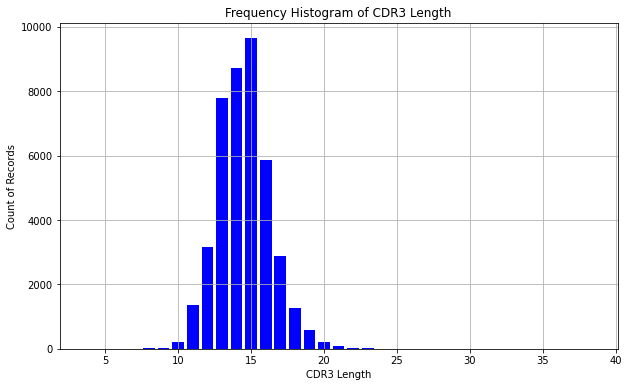

In [42]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(cdr3_length_count['CDR3_Length'], cdr3_length_count['count_of_records'], width=0.8, color='b')
plt.xlabel('CDR3 Length')
plt.ylabel('Count of Records')
plt.title('Frequency Histogram of CDR3 Length')
plt.grid(True)
plt.show()

In [43]:
sample_dataset.head(10)

,cdr3,antigen.epitope,vdjdb.score,species,antigen.species,gene,mhc.class,CDR3_Length
1,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,20
2,CASSFEAGQGFFSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,19
4,CASSFEPGQGFYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,19
6,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,20
8,CASSALASLNEQFF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,14
10,CASSYLPGQGDHYSNQPQHF,FLKEQGGL,2,HomoSapiens,HIV-1,TRB,MHCI,20
11,CASSFEAGQGFFSNQPQHF,FLKEQGGL,2,HomoSapiens,HIV-1,TRB,MHCI,19
13,CASSFEPGQGFYSNQPQHF,FLKEQGGL,2,HomoSapiens,HIV-1,TRB,MHCI,19
15,CASSYEPGQVSHYSNQPQHF,FLKEQGGL,2,HomoSapiens,HIV-1,TRB,MHCI,20
17,CASSYLPGQGDHYSNQPQHF,FLKETGGL,2,HomoSapiens,HIV-1,TRB,MHCI,20


In [44]:
## Remove rows which have CDR3 lengths < 10 or > 20
sample_dataset = sample_dataset[(sample_dataset['CDR3_Length'] >= 10) & (sample_dataset['CDR3_Length'] <= 20)]

## Finding Epitope Lengths

In [45]:
sample_dataset['Epitope_Length'] = sample_dataset.apply(lambda row: len(row['antigen.epitope']),axis=1)

In [46]:
epitope_length_count = sample_dataset.groupby(by=['Epitope_Length']).size().to_frame('count_of_records').reset_index()

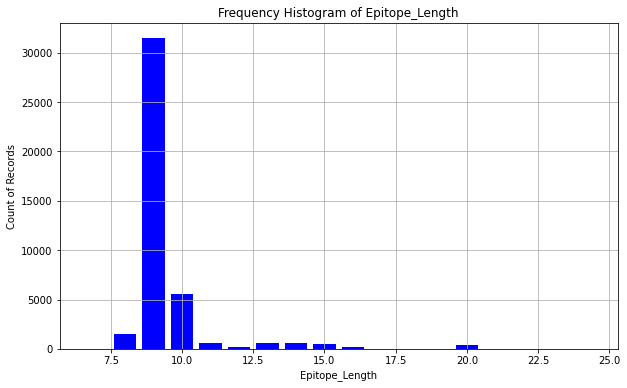

In [47]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(epitope_length_count['Epitope_Length'], epitope_length_count['count_of_records'], width=0.8, color='b')
plt.xlabel('Epitope_Length')
plt.ylabel('Count of Records')
plt.title('Frequency Histogram of Epitope_Length')
plt.grid(True)
plt.show()

## Taking only those epitopes which have 10 or more associated TCR sequences

In [48]:
group_antigen_cdr3 = sample_dataset.groupby(['antigen.epitope'])['cdr3'].unique().to_frame('cdr3_found').reset_index()

In [49]:
group_antigen_cdr3['cdr3_found_count'] = group_antigen_cdr3['cdr3_found'].apply(lambda x:len(x))

In [50]:
group_antigen_cdr3_count = group_antigen_cdr3.groupby(by=['cdr3_found_count']).size().to_frame('count').reset_index()

In [51]:
group_antigen_cdr3_count.sort_values('count',ascending=False).to_csv('group_antigen_cdr3_count.csv',index=False)

In [52]:
antigen_needed_list = group_antigen_cdr3[group_antigen_cdr3['cdr3_found_count'] >= 10]['antigen.epitope']

In [53]:
antigen_needed_list[:10]

8      AIFYLITPV
29     ALSKGVHFV
33     ALWEIQQVV
41     AMFWSVPTV
62     ARMILMTHF
64     ATDALMTGF
65     ATDALMTGY
71    AVFDRKSDAK
77     AYAQKIFKI
79     CINGVCWTV
Name: antigen.epitope, dtype: object

### Selecting only these epitopes

In [54]:
sample_dataset = sample_dataset[sample_dataset['antigen.epitope'].isin(antigen_needed_list)]

## Checking for ambigous amino acids

Taking only those TCR which have common (20) amino acids

https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/IMGTclasses.html
Citation:  Citing this page: Pommié, C. et al., J. Mol. Recognit., 17, 17-32 (2004). PMID: 14872534 pdf 

In [55]:
amino_acids_df = pd.DataFrame([
{
"name": "Alanine",
"abbreviation": "Ala",
"symbol": "A",
"description": "A nonpolar, aliphatic amino acid."
},
{
"name": "Arginine",
"abbreviation": "Arg",
"symbol": "R",
"description": "A positively charged, polar amino acid with a guanidino group."
},
{
"name": "Asparagine",
"abbreviation": "Asn",
"symbol": "N",
"description": "A polar amino acid with an amide group."
},
{
"name": "Aspartic acid",
"abbreviation": "Asp",
"symbol": "D",
"description": "A negatively charged, polar amino acid."
},
{
"name": "Cysteine",
"abbreviation": "Cys",
"symbol": "C",
"description": "A polar amino acid that can form disulfide bridges."
},
{
"name": "Glutamic acid",
"abbreviation": "Glu",
"symbol": "E",
"description": "A negatively charged, polar amino acid."
},
{
"name": "Glutamine",
"abbreviation": "Gln",
"symbol": "Q",
"description": "A polar amino acid with an amide group."
},
{
"name": "Glycine",
"abbreviation": "Gly",
"symbol": "G",
"description": "The smallest amino acid, often found in tight turns and bends."
},
{
"name": "Histidine",
"abbreviation": "His",
"symbol": "H",
"description": "A weakly polar amino acid with an imidazole ring."
},
{
"name": "Isoleucine",
"abbreviation": "Ile",
"symbol": "I",
"description": "A nonpolar, aliphatic amino acid."
},
{
"name": "Leucine",
"abbreviation": "Leu",
"symbol": "L",
"description": "A nonpolar, aliphatic amino acid."
},
{
"name": "Lysine",
"abbreviation": "Lys",
"symbol": "K",
"description": "A positively charged, polar amino acid with a long side chain."
},
{
"name": "Methionine",
"abbreviation": "Met",
"symbol": "M",
"description": "A nonpolar amino acid with a sulfur-containing side chain."
},
{
"name": "Phenylalanine",
"abbreviation": "Phe",
"symbol": "F",
"description": "A nonpolar amino acid with an aromatic ring."
},
{
"name": "Proline",
"abbreviation": "Pro",
"symbol": "P",
"description": "A cyclic amino acid that introduces bends and kinks in protein structures."
},
{
"name": "Serine",
"abbreviation": "Ser",
"symbol": "S",
"description": "A polar amino acid with a hydroxyl group."
},
{
"name": "Threonine",
"abbreviation": "Thr",
"symbol": "T",
"description": "A polar amino acid with a hydroxyl group."
},
{
"name": "Tryptophan",
"abbreviation": "Trp",
"symbol": "W",
"description": "A nonpolar amino acid with an aromatic indole ring."
},
{
"name": "Tyrosine",
"abbreviation": "Tyr",
"symbol": "Y",
"description": "A polar amino acid with a phenol group."
},
{
"name": "Valine",
"abbreviation": "Val",
"symbol": "V",
"description": "A nonpolar, aliphatic amino acid."
}
])

In [56]:
amino_acids_symbols = list(amino_acids_df['symbol'])
def filter_ambiguous_cdr3(row):
    cdr3 = row['cdr3']
    for amino_acid in cdr3:
        if amino_acid not in amino_acids_symbols:
            return 1
    return 0        

In [57]:
sample_dataset['ambiguous_cdr3s'] = sample_dataset.apply(filter_ambiguous_cdr3,axis=1)

In [58]:
sample_dataset['ambiguous_cdr3s'].unique()

array([0], dtype=int64)

There were no ambiguous CDRs found

## Finding which antigen.species have how many records for each vdjdb.score

In [59]:
graph_df = sample_dataset.groupby(['antigen.species','antigen.epitope','vdjdb.score']).size().to_frame('count').reset_index()

#### We can see that not all antigen.species have records with all vdjdb.score

In [60]:
graph_df.head(10)

,antigen.species,antigen.epitope,vdjdb.score,count
0,AdV,TDLGQNLLY,0,12
1,CMV,AYAQKIFKI,0,39
2,CMV,CRVLCCYVL,2,31
3,CMV,EHPTFTSQYRIQGKL,0,30
4,CMV,ELRRKMMYM,0,7
5,CMV,ELRRKMMYM,1,3
6,CMV,ELRRKMMYM,2,1
7,CMV,FPTKDVAL,1,10
8,CMV,FRCPRRFCF,2,10
9,CMV,IPSINVHHY,0,34


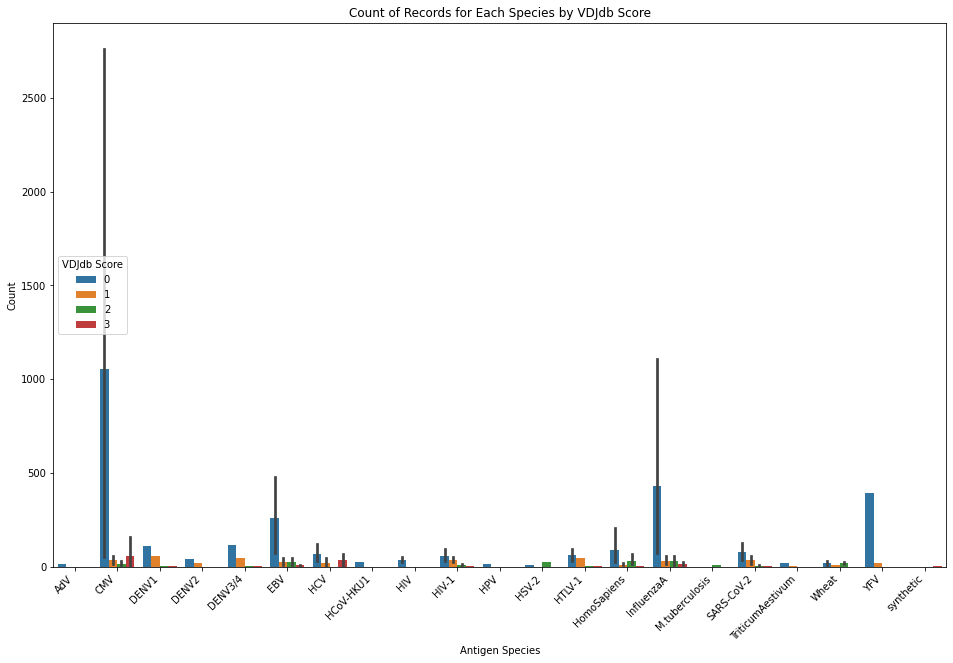

In [61]:
plt.figure(figsize=(16, 10))  # Set the figure size
sns.barplot(x='antigen.species', y='count', hue='vdjdb.score', data=graph_df)
plt.title('Count of Records for Each Species by VDJdb Score')
plt.xlabel('Antigen Species')
plt.ylabel('Count')
plt.legend(title='VDJdb Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [62]:
scores_needed = {0, 1, 2, 3}
species_with_all_scores = graph_df.groupby('antigen.species').apply(
    lambda x: scores_needed.issubset(x['vdjdb.score'].unique()))

In [63]:
species_to_plot = species_with_all_scores[species_with_all_scores].index

In [64]:
filtered_df = graph_df[graph_df['antigen.species'].isin(species_to_plot)]

#### Removed species which don't have all vdjdb.score

In [65]:
sample_dataset = sample_dataset[sample_dataset['antigen.species'].isin(species_to_plot)]

In [66]:
sample_dataset.head(10)

,cdr3,antigen.epitope,vdjdb.score,species,antigen.species,gene,mhc.class,CDR3_Length,Epitope_Length,ambiguous_cdr3s
1,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,20,8,0
2,CASSFEAGQGFFSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,19,8,0
4,CASSFEPGQGFYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,19,8,0
6,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,20,8,0
8,CASSALASLNEQFF,FLKEKGGL,2,HomoSapiens,HIV-1,TRB,MHCI,14,8,0
57,CASSLGETQYF,LLQTGIHVRVSQPSL,0,HomoSapiens,CMV,TRB,MHCII,11,15,0
58,CASSLGSRAQETQYF,LLQTGIHVRVSQPSL,0,HomoSapiens,CMV,TRB,MHCII,15,15,0
59,CASSLGQSTQYF,LLQTGIHVRVSQPSL,0,HomoSapiens,CMV,TRB,MHCII,12,15,0
60,CASSLQGSRRQGQNEQYF,LLQTGIHVRVSQPSL,0,HomoSapiens,CMV,TRB,MHCII,18,15,0
61,CASSSQGGEGTEAFF,LLQTGIHVRVSQPSL,0,HomoSapiens,CMV,TRB,MHCII,15,15,0


In [67]:
sample_dataset.to_csv('./Prepared_Df/pre_processed_vdj_db.csv',index=False)

---

### Encoding TCR and epitopes

Using Blosum62 to encode the amino acid sequences

In [68]:
# def encode_sequence(sequence, blosum_matrix):
#     encoded_seq = []
#     for acid in sequence:
#         encoded_seq.append(blosum_matrix[acid])
#     return encoded_seq

# bl62={'A':[4,-1,-2,-2,0,-1,-1,0,-2,-1,-1,-1,-1,-2,-1,1,0,-3,-2,0],
#       'R':[-1,4,0,-2,-3,1,0,-2,0,-3,-2,2,-1,-3,-2,-1,-1,-3,-2,-3],
#       'N':[-2,0,4,1,-3,0,0,0,1,-3,-3,0,-2,-3,-2,1,0,-4,-2,-3],
#       'D':[-2,-2,1,4,-3,0,2,-1,-1,-3,-4,-1,-3,-3,-1,0,-1,-4,-3,-3],
#       'C':[0,-3,-3,-3,4,-3,-4,-3,-3,-1,-1,-3,-1,-2,-3,-1,-1,-2,-2,-1],
#       'Q':[-1,1,0,0,-3,4,2,-2,0,-3,-2,1,0,-3,-1,0,-1,-2,-1,-2],
#       'E':[-1,0,0,2,-4,2,4,-2,0,-3,-3,1,-2,-3,-1,0,-1,-3,-2,-2],
#       'G':[0,-2,0,-1,-3,-2,-2,4,-2,-4,-4,-2,-3,-3,-2,0,-2,-2,-3,-3],
#       'H':[-2,0,1,-1,-3,0,0,-2,4,-3,-3,-1,-2,-1,-2,-1,-2,-2,2,-3],
#       'I':[-1,-3,-3,-3,-1,-3,-3,-4,-3,4,2,-3,1,0,-3,-2,-1,-3,-1,3],
#       'L':[-1,-2,-3,-4,-1,-2,-3,-4,-3,2,4,-2,2,0,-3,-2,-1,-2,-1,1],
#       'K':[-1,2,0,-1,-3,1,1,-2,-1,-3,-2,4,-1,-3,-1,0,-1,-3,-2,-2],
#       'M':[-1,-1,-2,-3,-1,0,-2,-3,-2,1,2,-1,4,0,-2,-1,-1,-1,-1,1],
#       'F':[-2,-3,-3,-3,-2,-3,-3,-3,-1,0,0,-3,0,4,-4,-2,-2,1,3,-1],
#       'P':[-1,-2,-2,-1,-3,-1,-1,-2,-2,-3,-3,-1,-2,-4,4,-1,-1,-4,-3,-2],
#       'S':[1,-1,1,0,-1,0,0,0,-1,-2,-2,0,-1,-2,-1,4,1,-3,-2,-2],
#       'T':[0,-1,0,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-2,-1,1,4,-2,-2,0],
#       'W':[-3,-3,-4,-4,-2,-2,-3,-2,-2,-3,-2,-3,-1,1,-4,-3,-2,4,2,-3],
#       'Y':[-2,-2,-2,-3,-2,-1,-2,-3,2,-1,-1,-2,-1,3,-3,-2,-2,2,4,-1],
#       'V':[0,-3,-3,-3,-1,-2,-2,-3,-3,3,1,-2,1,-1,-2,-2,0,-3,-1,4]}

# encoded_vectors = encode_sequence(sequence="CAISEYPPTGRKADTQYF", blosum_matrix=bl62)

# import numpy as np
# print(np.ravel(encoded_vectors))

Using Pandas Categorical to encode the columns

In [69]:
sample_dataset.columns

Index(['cdr3', 'antigen.epitope', 'vdjdb.score', 'species', 'antigen.species',
       'gene', 'mhc.class', 'CDR3_Length', 'Epitope_Length',
       'ambiguous_cdr3s'],
      dtype='object')

In [70]:
model_df = sample_dataset[['cdr3','antigen.species','mhc.class','antigen.epitope','vdjdb.score']]

In [71]:
model_df['cdr3_cat_code'] = pd.Categorical(model_df['cdr3']).codes

<ipython-input-71-f1b846506ddb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['cdr3_cat_code'] = pd.Categorical(model_df['cdr3']).codes


In [72]:
model_df['antigen.epitope_cat_code'] = pd.Categorical(model_df['antigen.epitope']).codes
model_df['antigen.species_cat_code'] = pd.Categorical(model_df['antigen.species']).codes
model_df['mhc.class_cat_code'] = pd.Categorical(model_df['mhc.class']).codes

<ipython-input-72-1fbd5dbe18ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['antigen.epitope_cat_code'] = pd.Categorical(model_df['antigen.epitope']).codes
<ipython-input-72-1fbd5dbe18ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['antigen.species_cat_code'] = pd.Categorical(model_df['antigen.species']).codes
<ipython-input-72-1fbd5dbe18ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [73]:
model_df.head(1)

,cdr3,antigen.species,mhc.class,antigen.epitope,vdjdb.score,cdr3_cat_code,antigen.epitope_cat_code,antigen.species_cat_code,mhc.class_cat_code
1,CASSYLPGQGDHYSNQPQHF,HIV-1,MHCI,FLKEKGGL,2,27285,25,4,0


In [74]:
model_df.columns

Index(['cdr3', 'antigen.species', 'mhc.class', 'antigen.epitope',
       'vdjdb.score', 'cdr3_cat_code', 'antigen.epitope_cat_code',
       'antigen.species_cat_code', 'mhc.class_cat_code'],
      dtype='object')

In [75]:
df_final = model_df[['vdjdb.score', 'cdr3_cat_code', 'antigen.epitope_cat_code',
       'antigen.species_cat_code', 'mhc.class_cat_code']]

In [76]:
df_final

,vdjdb.score,cdr3_cat_code,antigen.epitope_cat_code,antigen.species_cat_code,mhc.class_cat_code
1,2,27285,25,4,0
2,2,6552,25,4,0
4,2,6579,25,4,0
6,2,26920,25,4,0
8,2,4400,25,4,0
...,...,...,...,...,...
92395,0,3950,47,4,0
92396,1,3176,47,4,0
92397,1,25601,47,4,0
92398,1,4018,47,4,0


---

### Applying Classification model

    1. Decision Trees
    2. Random Forest

### Approach 1

Using epitope as target and vdj.score as a feature

In [86]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score, recall_score, multilabel_confusion_matrix,hamming_loss, classification_report, f1_score,roc_auc_score, roc_curve


In [78]:
X = df_final[['cdr3_cat_code',
       'antigen.species_cat_code', 'mhc.class_cat_code']] # Features
y = df_final[['antigen.epitope_cat_code']]# Target variable


In [79]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test


In [80]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Metrics to use?

Hamming Loss: This is particularly useful in multi-label classification. It measures the fraction of labels that are incorrectly predicted, i.e., the fraction of the wrong labels to the total number of labels.

In [81]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
#     print("Precision = " ,precision_score(y_actual, y_predicted,))
#     print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted,average='macro'))
    pass

### Which averaging techniques to use? Micro or Macro?

In [84]:
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred, average='weighted'))
# print("Recall:", recall_score(y_test, y_pred, average='weighted'))

generate_model_report(y_test, y_pred)

Accuracy =  0.5167820990942994
F1 Score =  0.17826576380883594


Hamming Loss: 0.4832179009057006
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.23      0.27      0.25        11
           2       0.00      0.00      0.00        18
           3       0.10      0.08      0.09        24
           4       0.30      0.33      0.32       473
           5       0.12      0.07      0.09        14
           6       0.00      0.00      0.00         3
           7       0.33      0.11      0.17         9
           8       0.00      0.00      0.00         3
           9       0.27      0.30      0.29        10
          10       0.13      0.14      0.14        14
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         4
          13       0.16      0.16      0.16        31
          14       0.15      0.16      0.15        31
          15       0.00      0.00      0.00         7
          16       0.00 

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


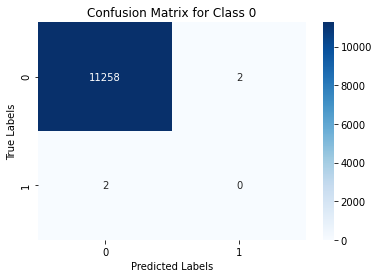

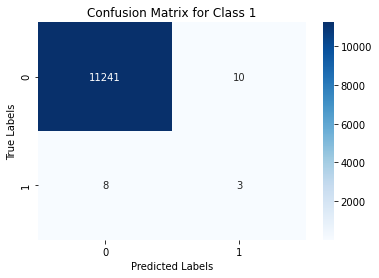

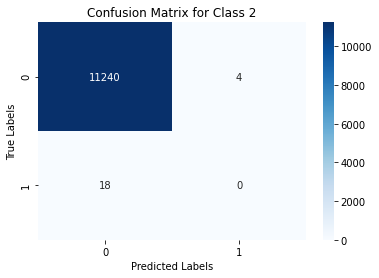

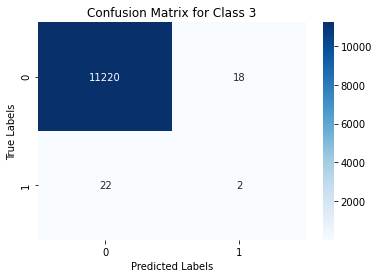

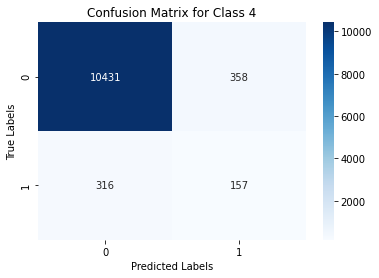

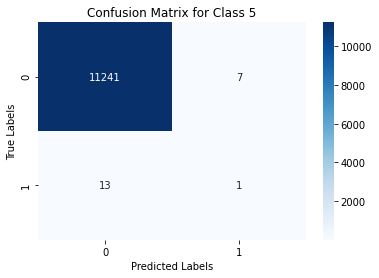

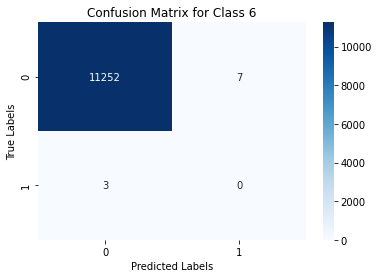

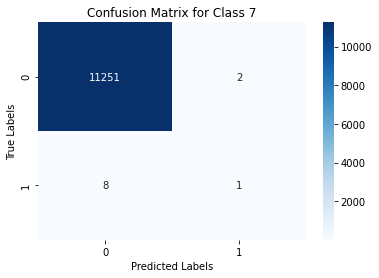

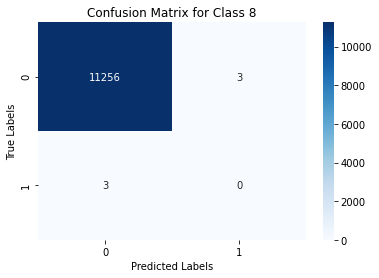

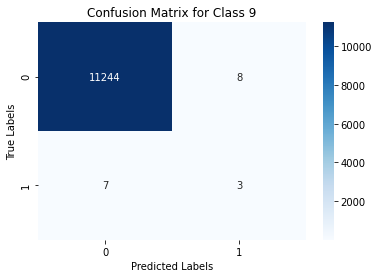

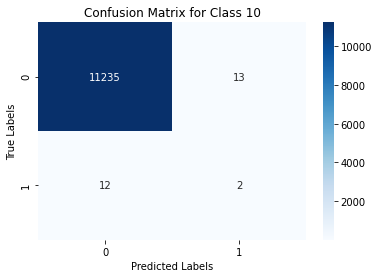

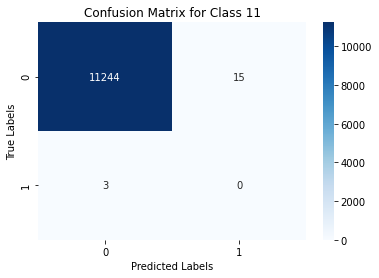

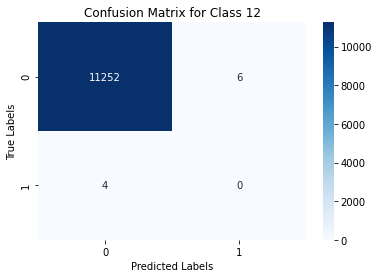

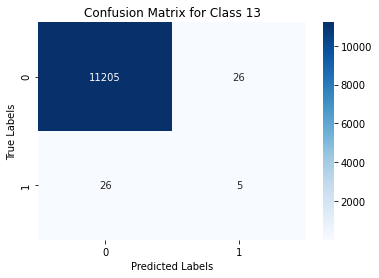

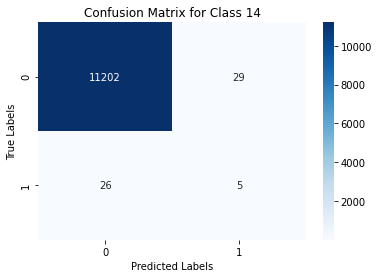

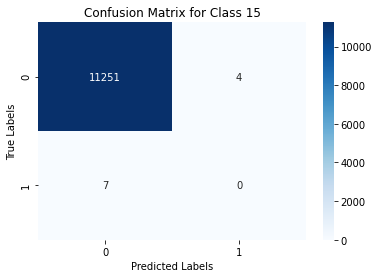

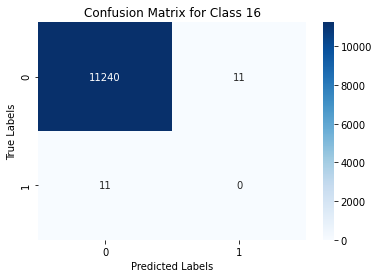

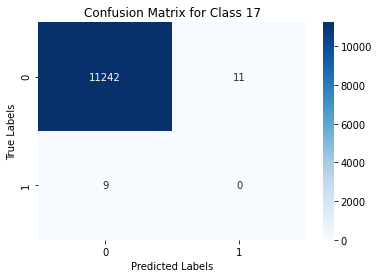

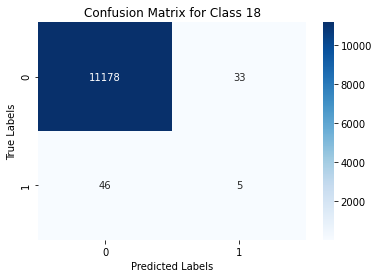

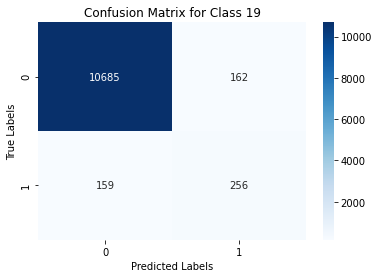

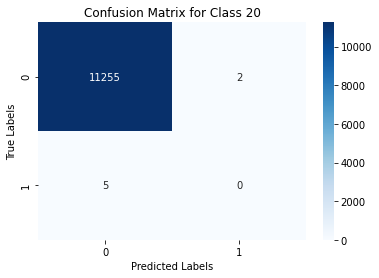

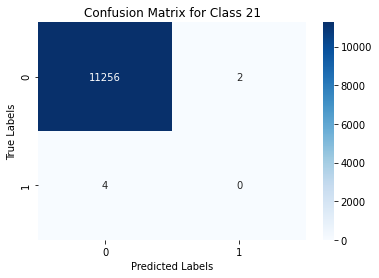

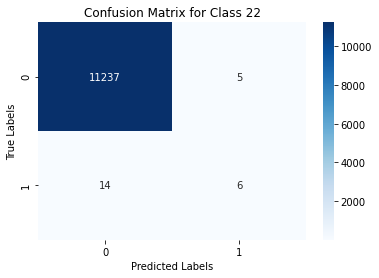

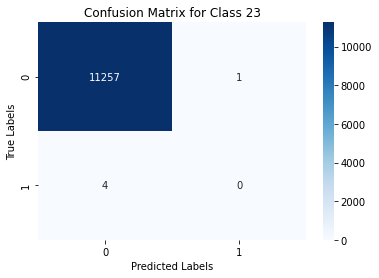

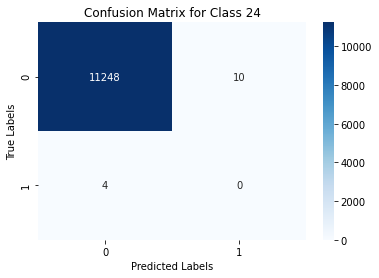

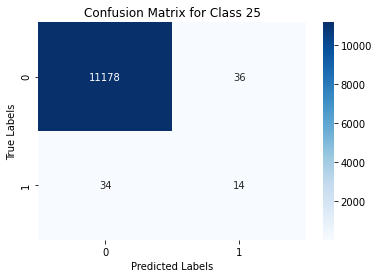

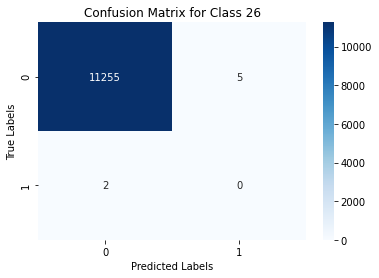

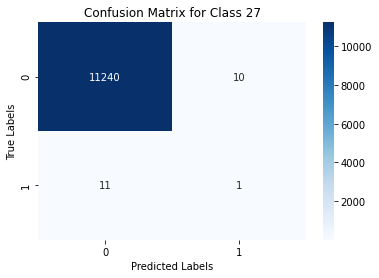

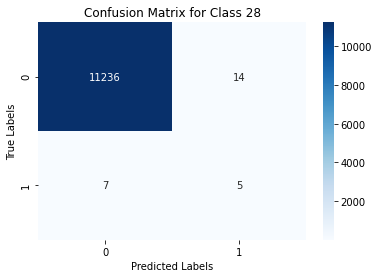

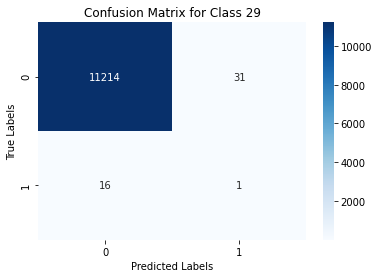

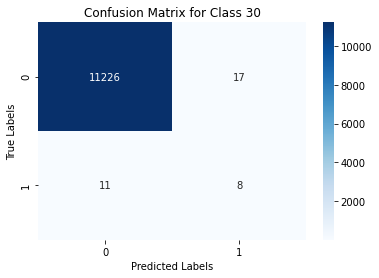

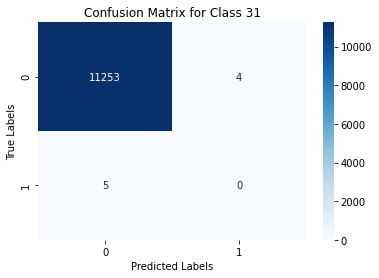

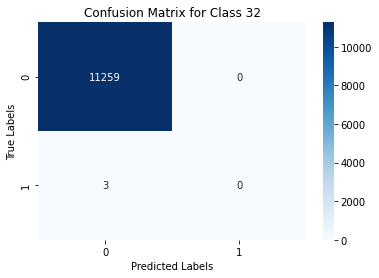

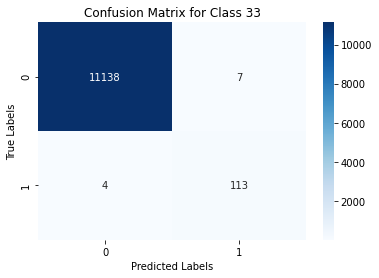

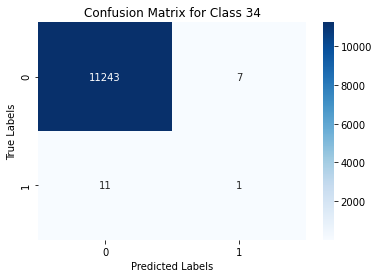

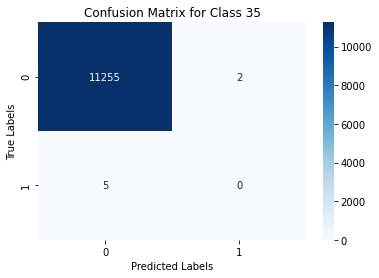

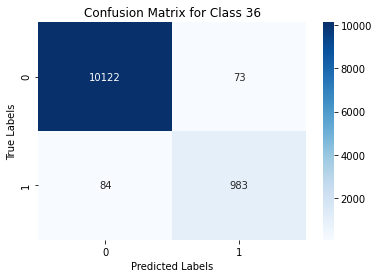

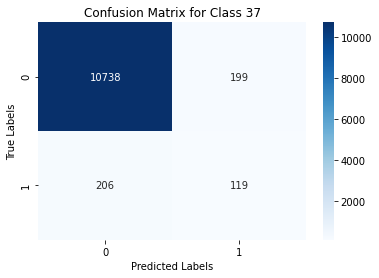

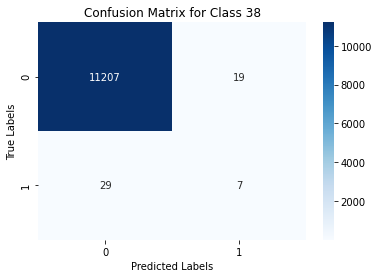

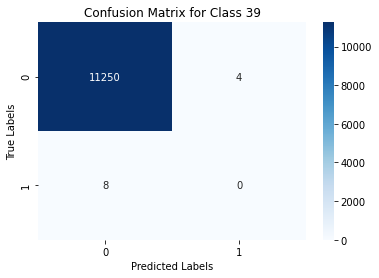

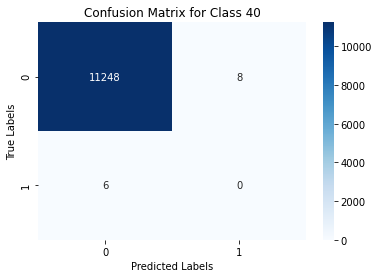

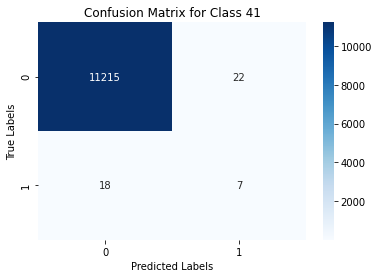

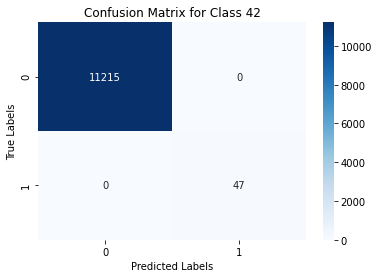

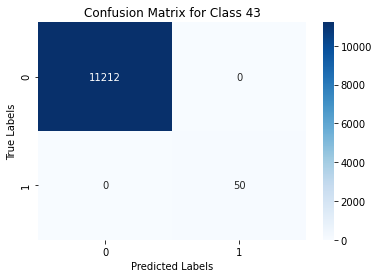

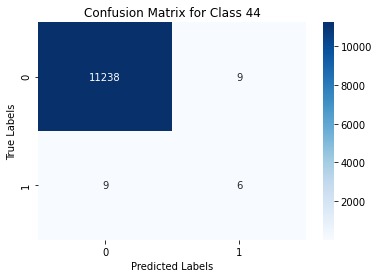

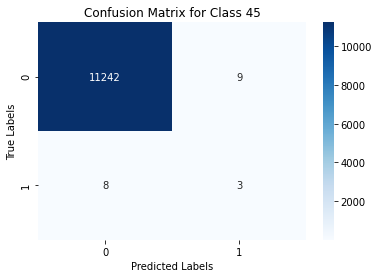

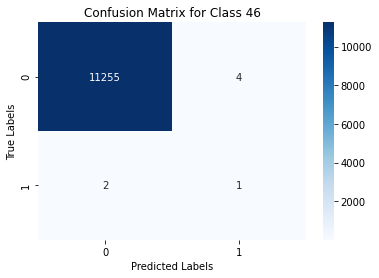

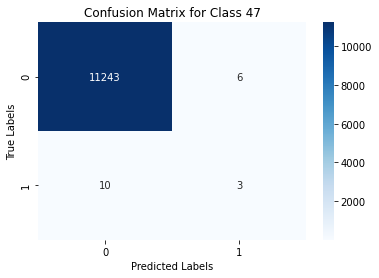

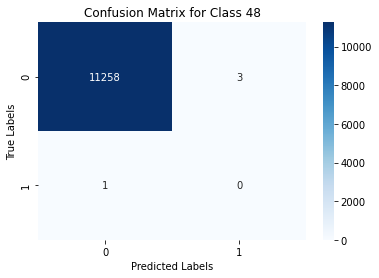

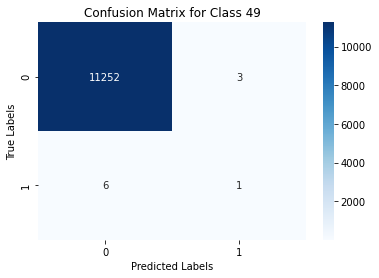

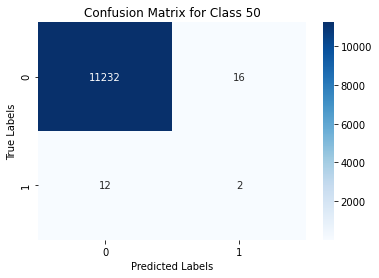

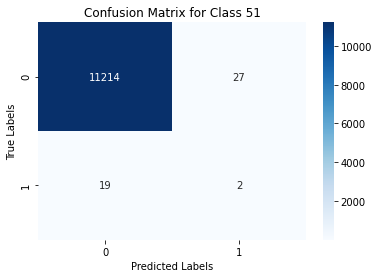

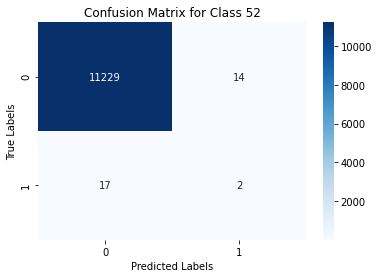

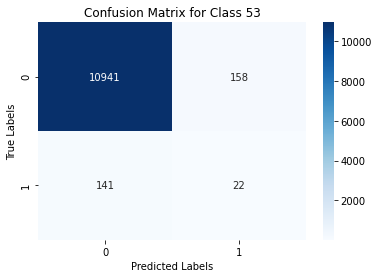

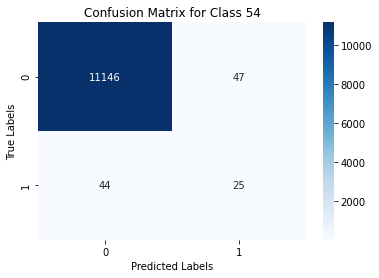

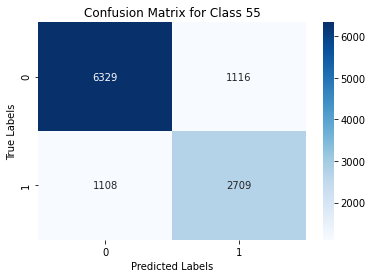

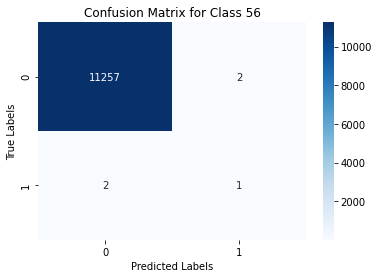

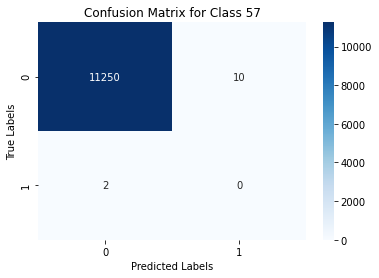

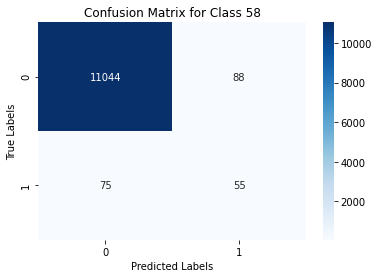

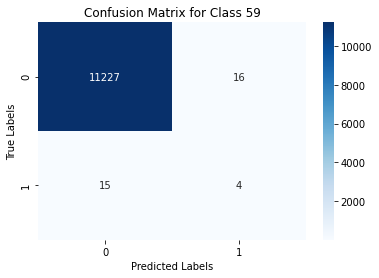

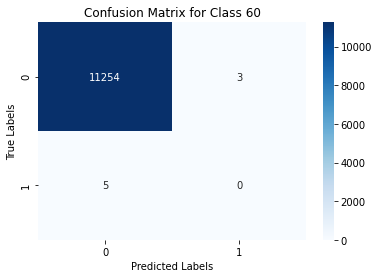

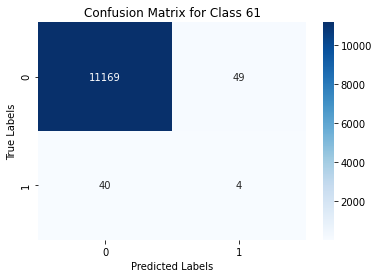

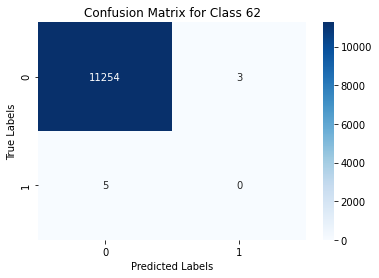

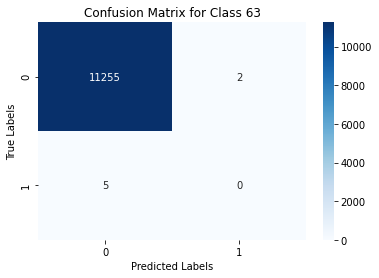

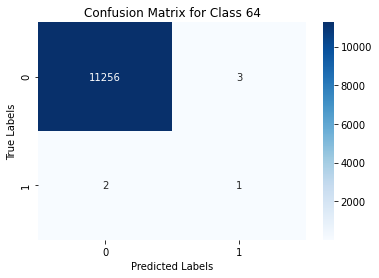

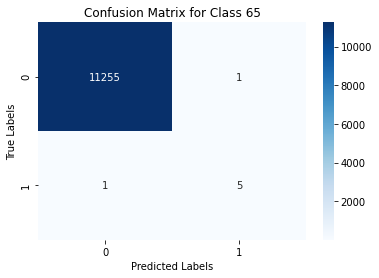

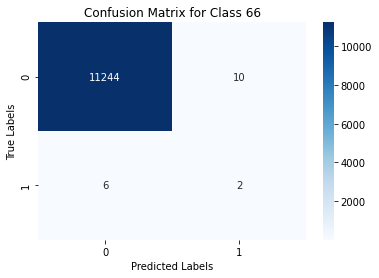

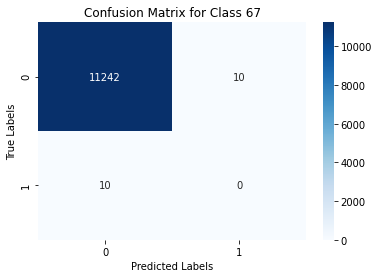

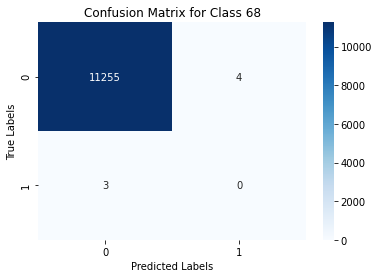

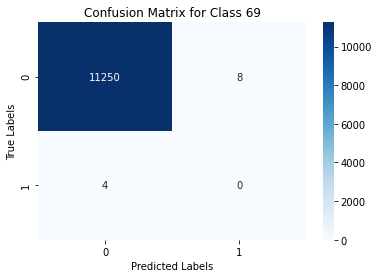

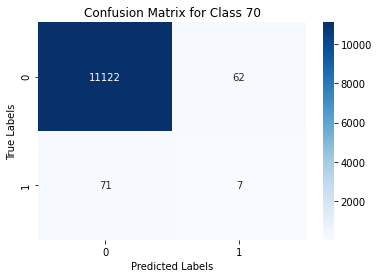

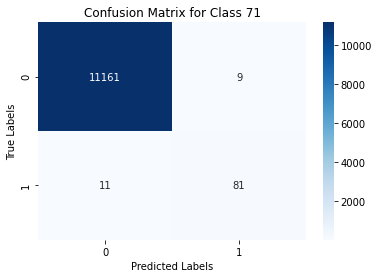

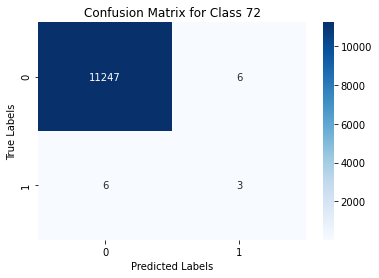

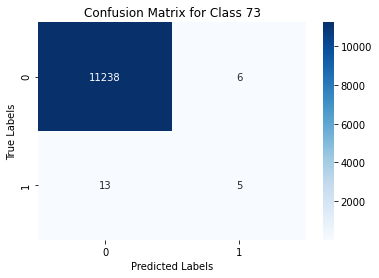

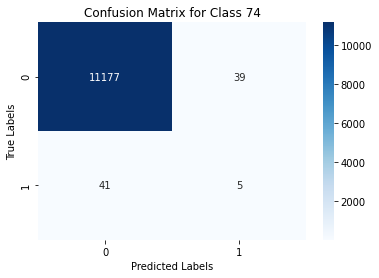

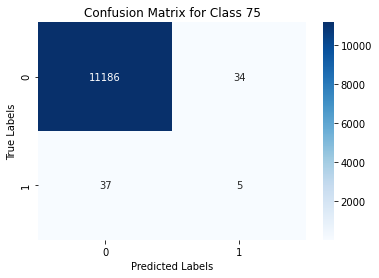

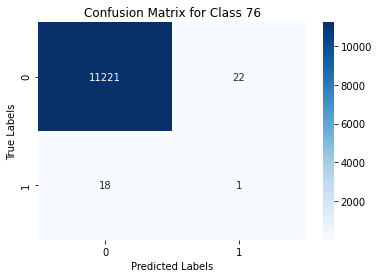

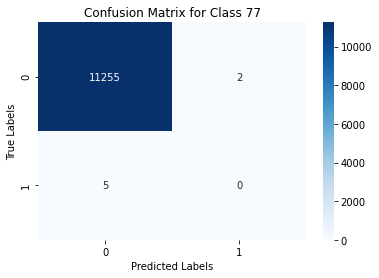

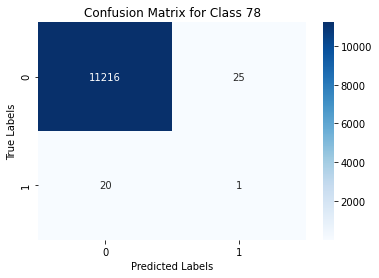

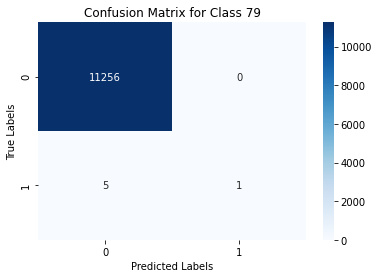

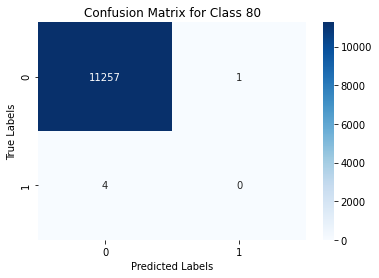

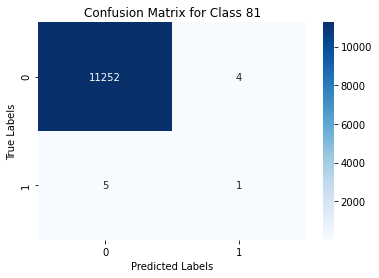

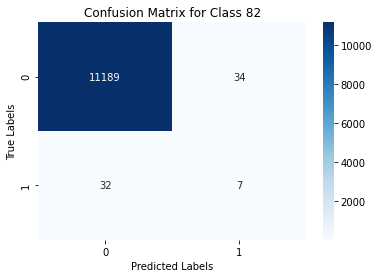

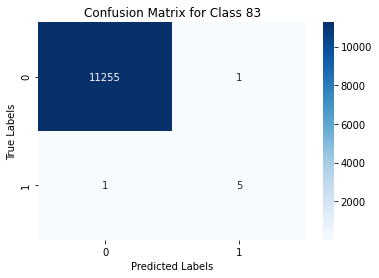

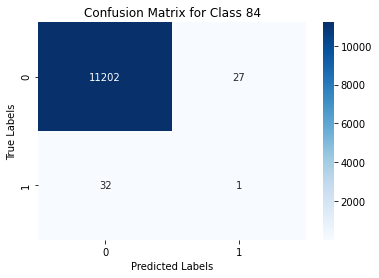

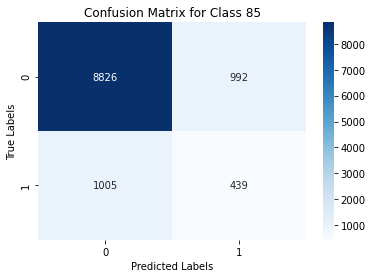

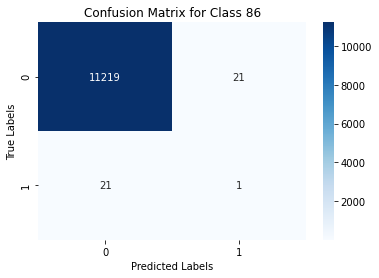

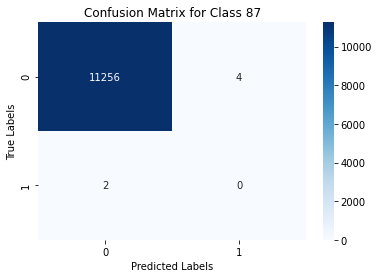

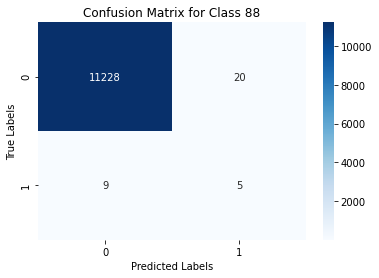

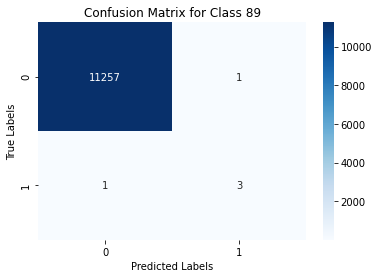

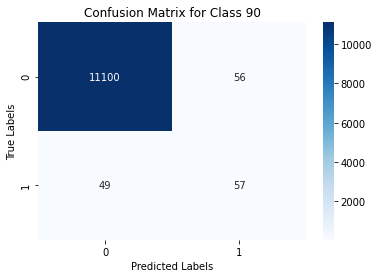

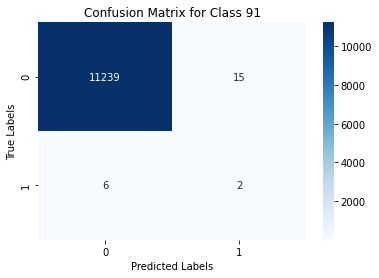

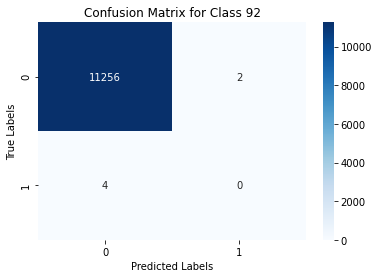

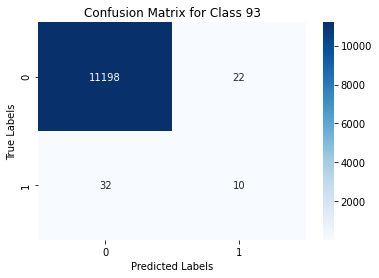

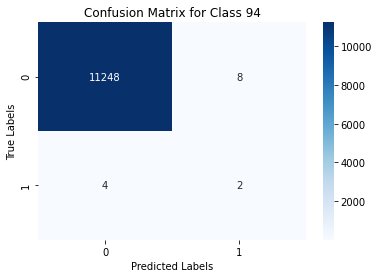

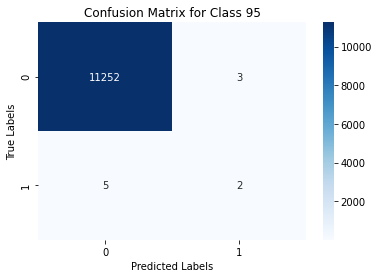

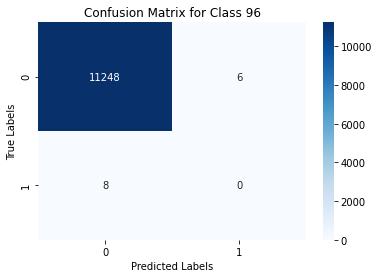

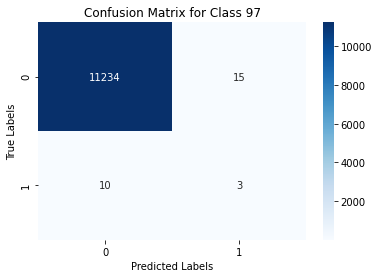

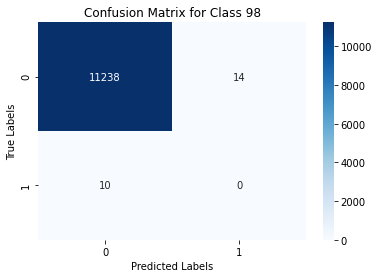

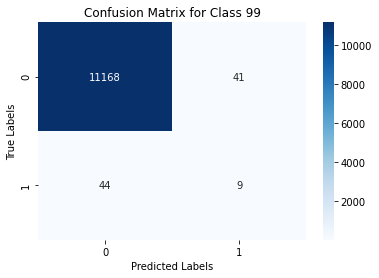

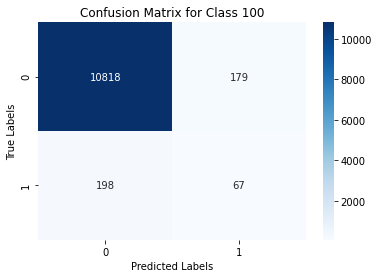

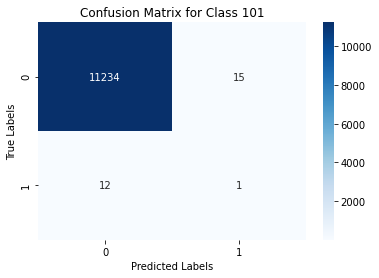

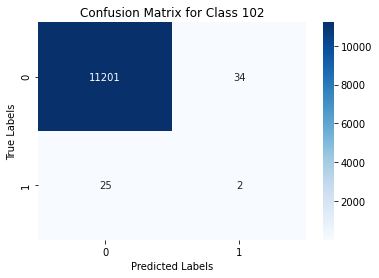

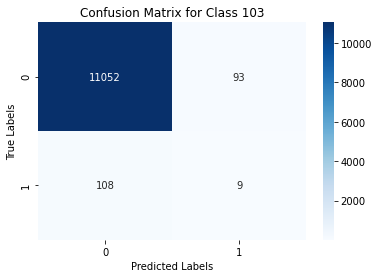

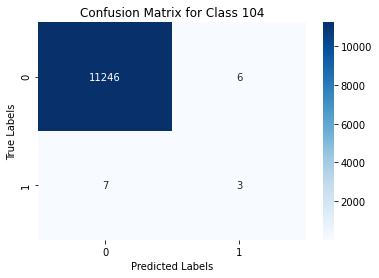

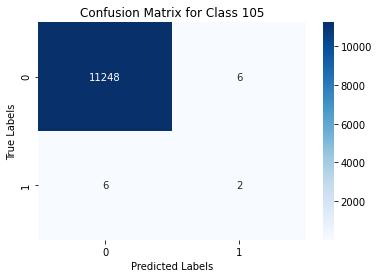

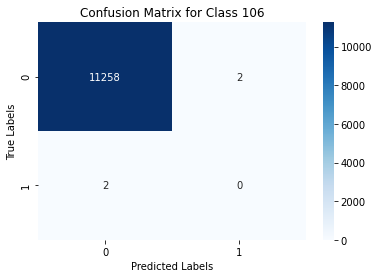

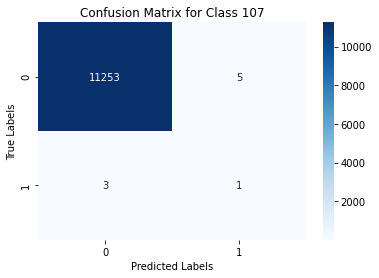

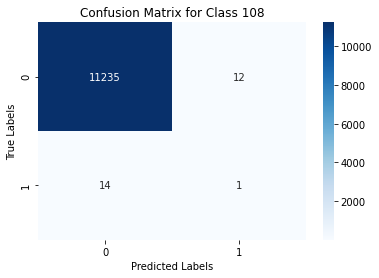

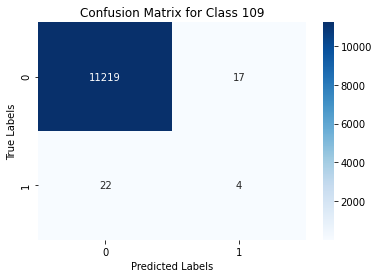

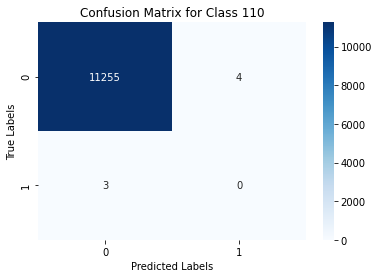

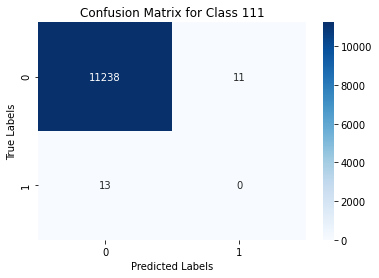

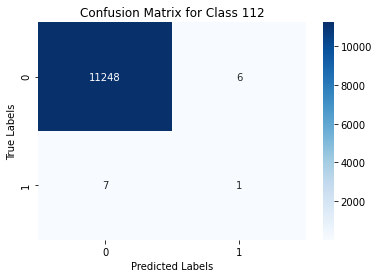

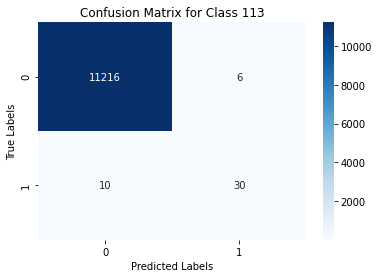

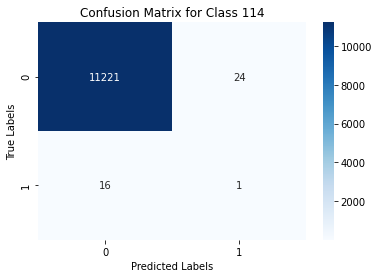

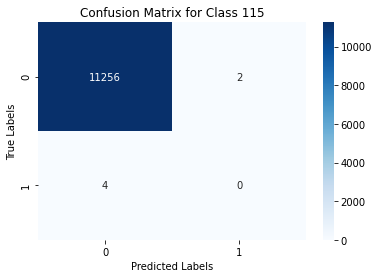

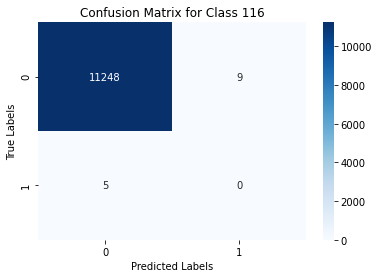

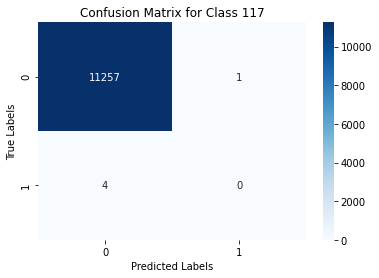

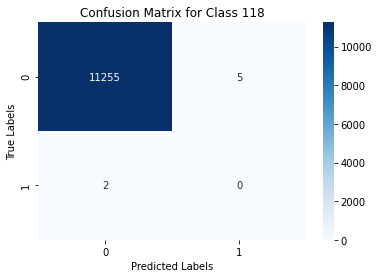

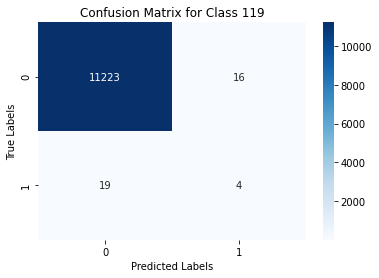

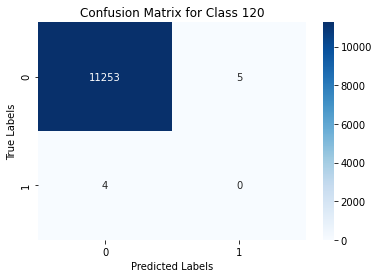

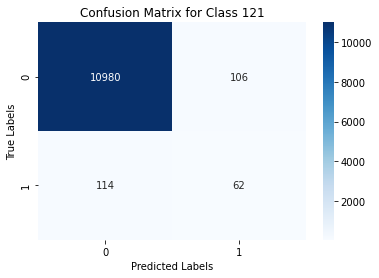

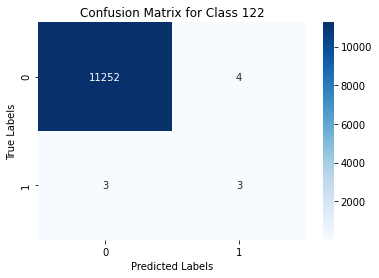

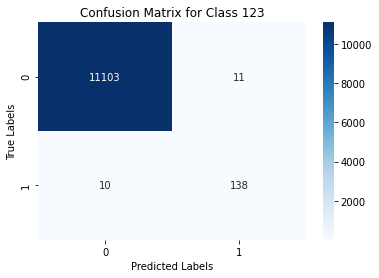

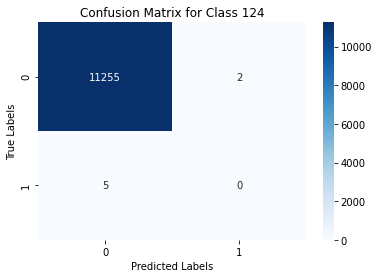

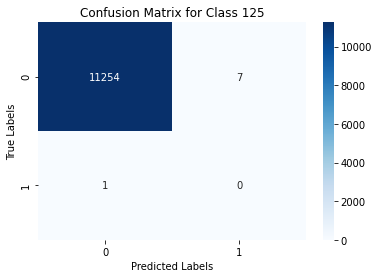

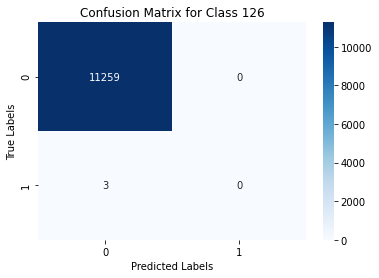

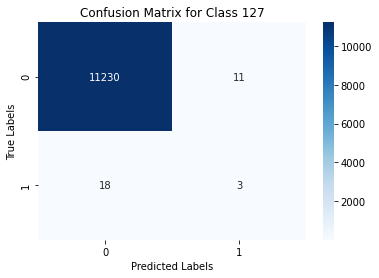

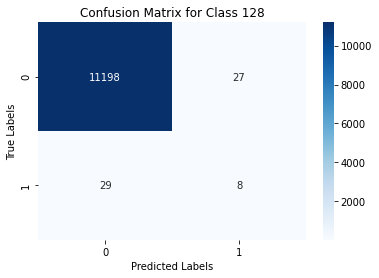

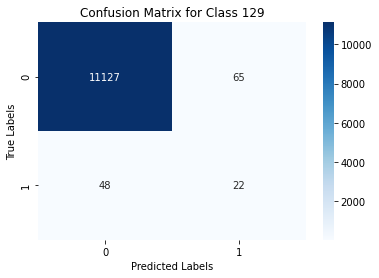

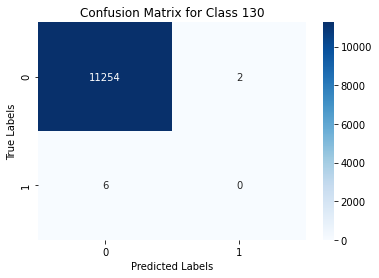

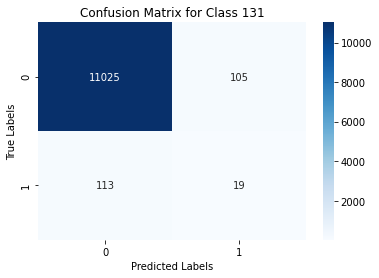

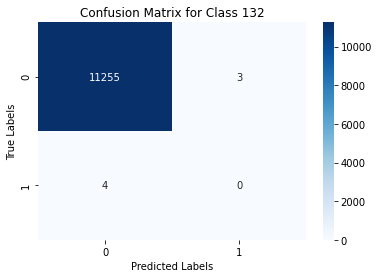

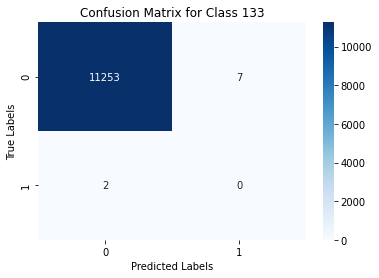

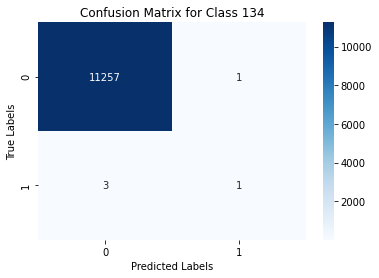

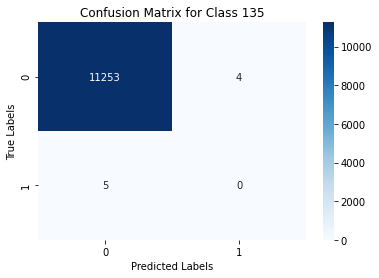

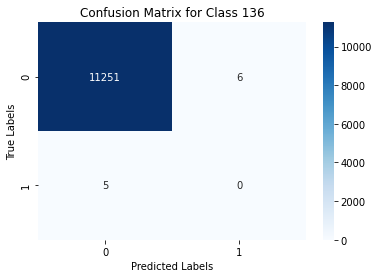

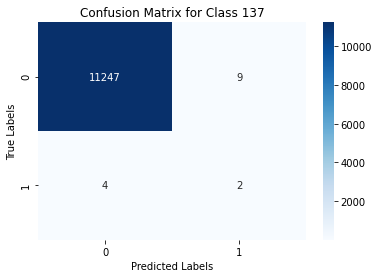

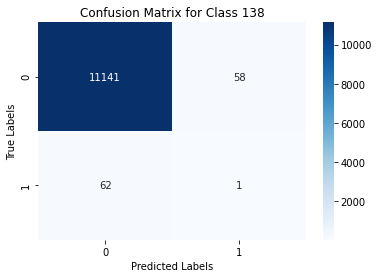

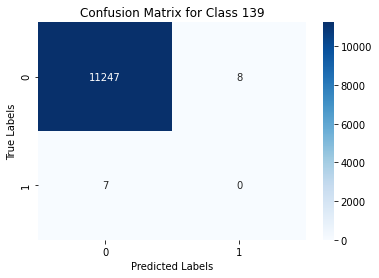

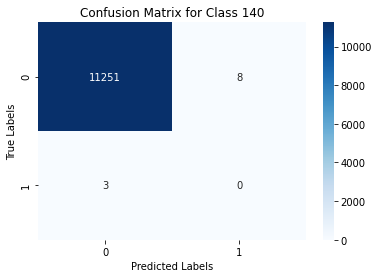

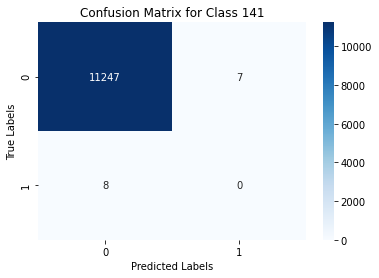

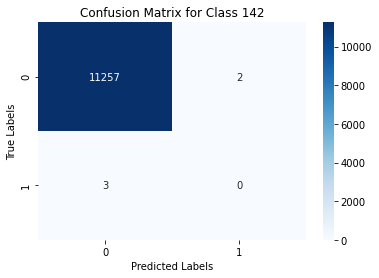

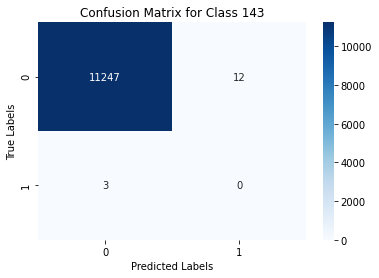

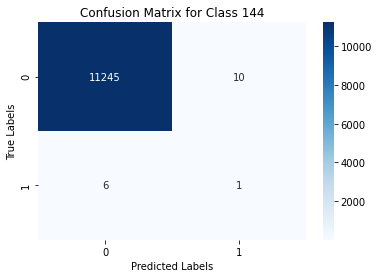

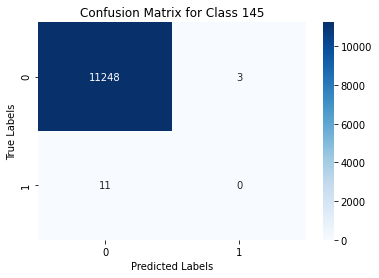

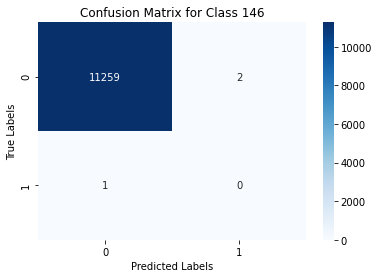

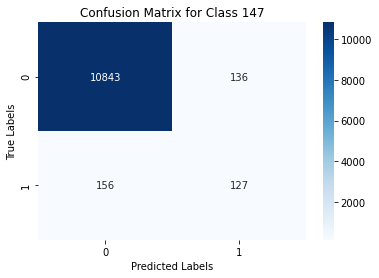

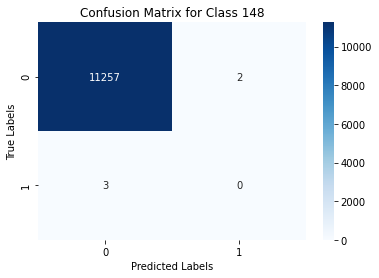

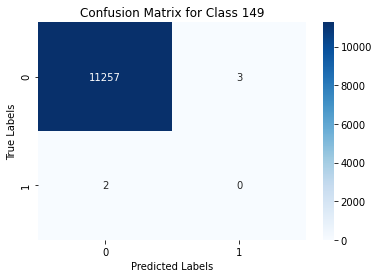

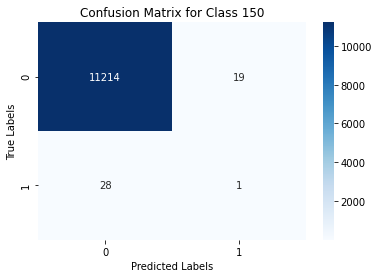

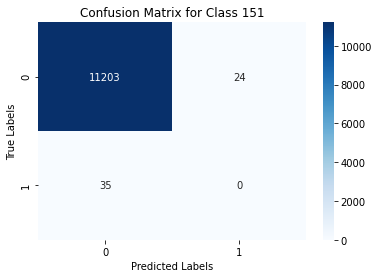

In [93]:
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# # Confusion Matrix for each class
conf_matrices = multilabel_confusion_matrix(y_test, y_pred)
for i, matrix in enumerate(conf_matrices):
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Class {i}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

### Using weights to balance the data

In [114]:
features = ['cdr3_cat_code',
       'antigen.species_cat_code', 'mhc.class_cat_code']
target = 'antigen.epitope_cat_code'

55     12596
85      4717
36      3603
4       1644
19      1420
       ...  
89        10
110       10
26        10
32        10
79        10
Name: antigen.epitope_cat_code, Length: 152, dtype: int64


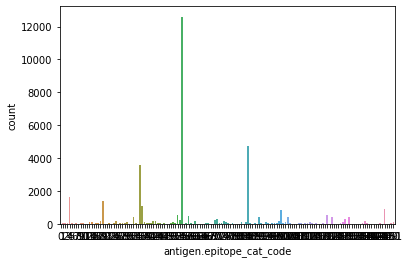

In [115]:
import seaborn as sns
ax = sns.countplot(x=target, data=df_final)
print(df_final[target].value_counts())